In [78]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

#import ECG detector library for analysis
#https://pypi.org/project/py-ecg-detectors/
!pip install py-ecg-detectors
from ecgdetectors import Detectors

In [79]:
#save the patient file as a pandas DataFrame
url = "https://raw.githubusercontent.com/ejfarago/BMEN301-Class-Examples/refs/heads/main/Patient_100_ECG.csv"
ecg = pd.read_csv(url)

In [80]:
#view the first 5 entries
ecg.head()

,Unnamed: 0,time_ms,MLII,V5
0,0,0.000000,-0.145,-0.065
1,1,2.777778,-0.145,-0.065
2,2,5.555556,-0.145,-0.065
3,3,8.333333,-0.145,-0.065
4,4,11.111111,-0.145,-0.065


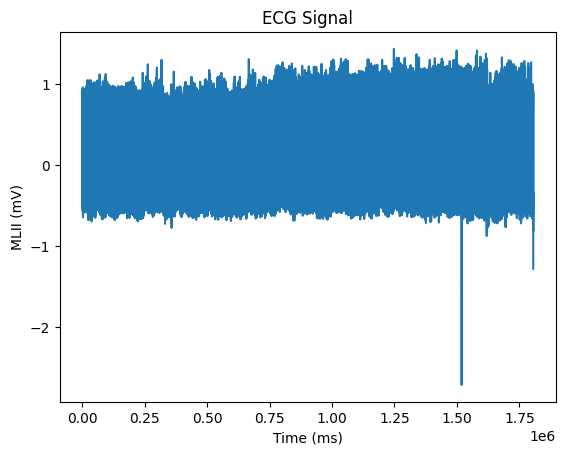

In [81]:
#plot MLII vs. time (ms)
plt.plot(ecg['time_ms'], ecg['MLII'])
plt.xlabel('Time (ms)')
plt.ylabel('MLII (mV)')
plt.title('ECG Signal')
plt.show()

In [83]:
#Calculate the time in seconds
ecg["time_s"]= ecg["time_ms"]/1000
ecg.head()

,Unnamed: 0,time_ms,MLII,V5,time_s
0,0,0.000000,-0.145,-0.065,0.000000
1,1,2.777778,-0.145,-0.065,0.002778
2,2,5.555556,-0.145,-0.065,0.005556
3,3,8.333333,-0.145,-0.065,0.008333
4,4,11.111111,-0.145,-0.065,0.011111


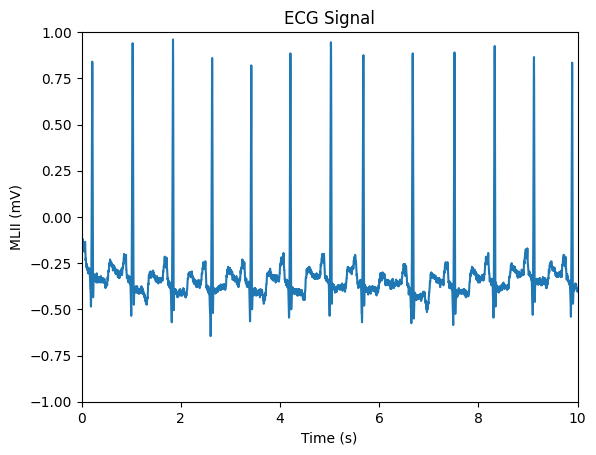

In [85]:
#Plot the ECG signal vs. Time (s)
#Use xlim and ylim to visualize individual heartbeats
plt.plot(ecg['time_s'], ecg['MLII'])
plt.xlabel('Time (s)')
plt.ylabel('MLII (mV)')
plt.title('ECG Signal')
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.show()

In [87]:
#Before the detectors can be used the class must first be initalised with the sampling rate of the ECG recording
fs = 360
detectors = Detectors(fs)

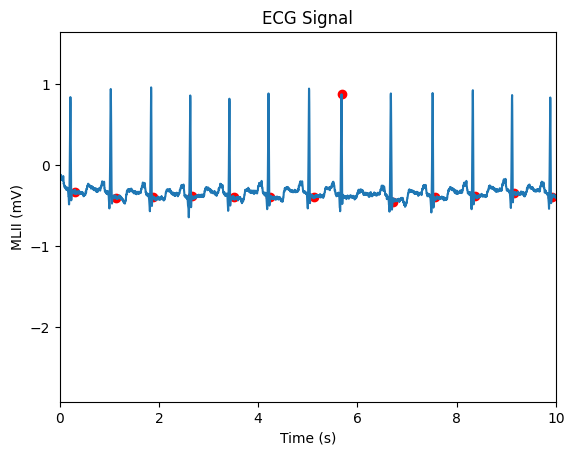

In [89]:
r_peaks = detectors.pan_tompkins_detector(ecg['MLII']) #get peaks of the QRS Complexes
plt.plot(ecg['time_s'], ecg['MLII'])
plt.xlabel('Time (s)')
plt.ylabel('MLII (mV)')
plt.title('ECG Signal')
plt.scatter(ecg['time_s'][r_peaks], ecg['MLII'][r_peaks], c='r')
plt.xlim(0, 10)
plt.show()

In [90]:
#calculate heart rate
import numpy as np
rr_intervals = np.diff(r_peaks) / fs #find the time difference between each peak
heart_rate = 60 / np.mean(rr_intervals) #find the mean heart rate
print("Average Heart Rate: ", round(heart_rate,2), "bpm")

Average Heart Rate:  75.51 bpm
